# Analyze Hyperparameter Tuning


In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import sys
FILENAME = "f_KNN_MUTAG_TEST_2024-06-26_15-52-52_results.csv"

In [2]:

filepath= "configs/results/HP_MUTAG/HP_20251116_SVC_Random-Walk-Edit_precomputed_MUTAG.xlsx"

In [3]:

# # find the file in the directory
# filepath = None
# for root, dirs, files in os.walk("."):
#     if FILENAME in files:
#         filepath = os.path.join(root, FILENAME)
#         break


In [4]:
hyper_df = pd.read_excel(filepath)
display(len(hyper_df))
display(hyper_df.head(10))

150

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_decay_lambda,param_kernel_type,param_max_walk_length,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,fold_index
0,0.028366,0.000476,0.014964,0.000268,0.002030,NaN,0.315661,precomputed,6,"{'C': 0.002030430044931339, 'class_weight': No...",0.958960,0.890110,0.829545,0.733333,0.791667,0.840723,0.078081,2,0
1,0.022874,0.000523,0.012434,0.000211,0.012585,NaN,0.126932,precomputed,4,"{'C': 0.012585400975833157, 'class_weight': No...",0.850000,0.894242,0.794802,0.733333,0.791667,0.812809,0.054958,4,0
2,0.020119,0.000409,0.011012,0.000151,0.017455,balanced,0.048021,precomputed,3,"{'C': 0.01745512028234319, 'class_weight': 'ba...",0.691429,0.894242,0.794802,0.733333,0.791667,0.781094,0.068444,6,0
3,0.020051,0.000703,0.011095,0.000467,0.001669,balanced,0.361253,precomputed,3,"{'C': 0.0016692935916742548, 'class_weight': '...",0.850000,0.890110,0.829545,0.733333,0.791667,0.818931,0.053319,3,0
4,0.029113,0.000797,0.015452,0.000416,2.510828,NaN,0.030832,precomputed,6,"{'C': 2.5108280989352454, 'class_weight': None...",0.691429,0.894242,0.794802,0.733333,0.791667,0.781094,0.068444,6,0
5,0.022167,0.000259,0.012070,0.000358,0.005392,NaN,0.070933,precomputed,4,"{'C': 0.005392372589969733, 'class_weight': No...",0.691429,0.894242,0.794802,0.733333,0.791667,0.781094,0.068444,6,0
6,0.020022,0.000129,0.011012,0.000055,0.245110,NaN,0.233763,precomputed,3,"{'C': 0.24511020512815337, 'class_weight': Non...",0.958960,0.928230,0.794802,0.733333,0.791667,0.841398,0.086814,1,0
7,0.026080,0.000495,0.014059,0.000091,0.000802,balanced,0.129371,precomputed,5,"{'C': 0.0008024367142245315, 'class_weight': '...",0.850000,0.894242,0.794802,0.733333,0.791667,0.812809,0.054958,4,0
8,0.029276,0.000748,0.015793,0.000265,0.760283,balanced,0.005825,precomputed,6,"{'C': 0.7602828630352086, 'class_weight': 'bal...",0.691429,0.894242,0.794802,0.733333,0.791667,0.781094,0.068444,6,0
9,0.532685,0.180304,0.260337,0.054875,0.008552,NaN,0.083101,precomputed,-1,"{'C': 0.008551540373506233, 'class_weight': No...",0.721707,0.499444,0.730424,0.733333,0.712919,0.679565,0.090343,10,0


In [5]:
results_column ="mean_test_score"

In [6]:
# a function that gets two column names form the df, one result column, which represents the score, and one regarding a certain hyperparameter.
# this second parameter, can be categorical or numerical.
# if its categorical, i want a box plot, plotting the mean and max score for each category
# if its numerical, i want a scatter plot, plotting the score against the hyperparameter value
def plot_hyperparameter_effect(hyper_df, hyperparameter_column, results_column, Model_Name):
    if hyperparameter_column not in hyper_df.columns:
        print(f"Column {hyperparameter_column} not found in DataFrame.")
        return
    if results_column not in hyper_df.columns:
        print(f"Column {results_column} not found in DataFrame.")
        return

    # check if the hyperparameter column is numerical or categorical
    plt.figure(figsize=(10, 6))
    plt.title(f'{Model_Name} - Effect of {hyperparameter_column} on {results_column}')

    if pd.api.types.is_numeric_dtype(hyper_df[hyperparameter_column]):
        # numerical, scatter plot
        
        sns.scatterplot(data=hyper_df, x=hyperparameter_column, y=results_column)
        # add a line plot for better visibility
        # sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, errorbar=None, color='orange')
        sns.regplot(data=hyper_df, x=hyperparameter_column, y=results_column, scatter=False, color='green', label='Trend Line')
        plt.xlabel(hyperparameter_column)
        plt.ylabel(results_column)
        plt.grid(True)
        plt.show()
    else:
        # categorical, bor plot
        # summary_df = hyper_df.groupby(hyperparameter_column)[results_column].agg(['mean', 'max']).reset_index()
        # summary_df = summary_df.melt(id_vars=hyperparameter_column, value_vars=['mean', 'max'], var_name='Statistic', value_name='Score')

        # Use violinplot for richer distribution visualization
        sns.violinplot(data=hyper_df, x=hyperparameter_column, y=results_column, inner="box", density_norm='width')
        # Overlay mean and max points for each category
        summary_df = hyper_df.groupby(hyperparameter_column)[results_column].agg(['mean', 'max']).reset_index()
        sns.scatterplot(data=summary_df, x=hyperparameter_column, y="mean", color="blue", label="Mean", marker="o", s=100, zorder=10)
        sns.scatterplot(data=summary_df, x=hyperparameter_column, y="max", color="red", label="Max", marker="X", s=100, zorder=10)
        plt.xlabel(hyperparameter_column)
        plt.ylabel(results_column)
        plt.legend(title='Statistic')
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.show()

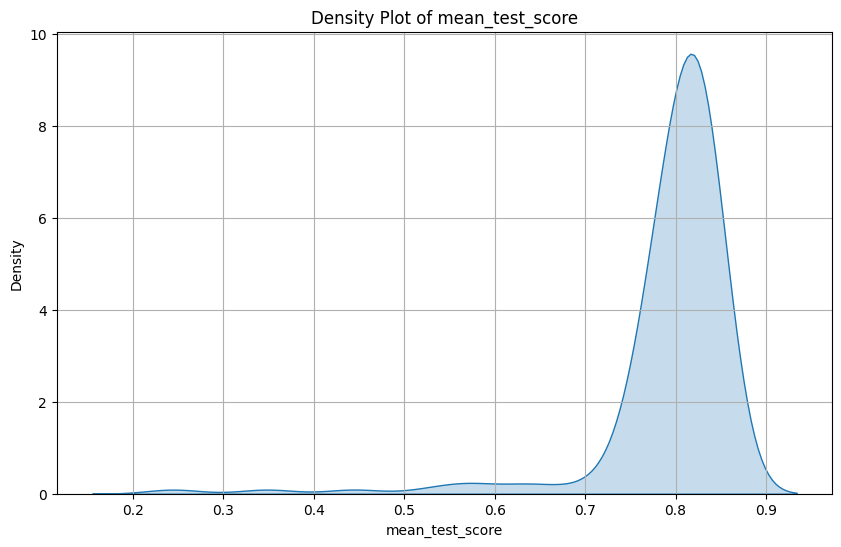

In [7]:
# plot the desity of the results collumn
plt.figure(figsize=(10, 6))
plt.title(f'Density Plot of {results_column}')
sns.kdeplot(data=hyper_df, x=results_column, fill=True)
plt.xlabel(results_column)
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [8]:
# give for the top 50 scoring hyperparameter settings, the mean of all hyperparameters
top_50_df = hyper_df.nlargest(50, results_column)
display(top_50_df.describe())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decay_lambda,param_max_walk_length,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,fold_index
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.039227,0.000916,0.020518,0.000567,1.084267,0.103518,3.820000,0.965902,0.906133,0.824239,0.669649,0.802627,0.833710,0.104415,1.380000,7.140000
std,0.081127,0.001774,0.040411,0.001256,2.090061,0.160817,1.803511,0.016463,0.023298,0.035522,0.039838,0.032234,0.004270,0.011933,0.666701,4.252298
min,0.015745,0.000051,0.008676,0.000055,0.000634,0.005021,-1.000000,0.915761,0.866667,0.760000,0.612221,0.743590,0.828663,0.078081,1.000000,0.000000
25%,0.018842,0.000266,0.010175,0.000096,0.004780,0.011004,2.250000,0.959477,0.884467,0.794802,0.629630,0.784689,0.829753,0.095106,1.000000,3.000000
50%,0.022385,0.000454,0.012213,0.000186,0.057058,0.027717,4.000000,0.961489,0.914773,0.823737,0.666667,0.807445,0.832525,0.101386,1.000000,8.000000
75%,0.027697,0.000706,0.014885,0.000267,1.303144,0.136762,5.000000,0.963370,0.920635,0.856459,0.696970,0.823737,0.837074,0.116813,2.000000,11.000000
max,0.431979,0.011840,0.216853,0.007258,8.492881,0.919540,6.000000,1.000000,0.958960,0.890110,0.733333,0.850000,0.844309,0.118549,3.000000,14.000000


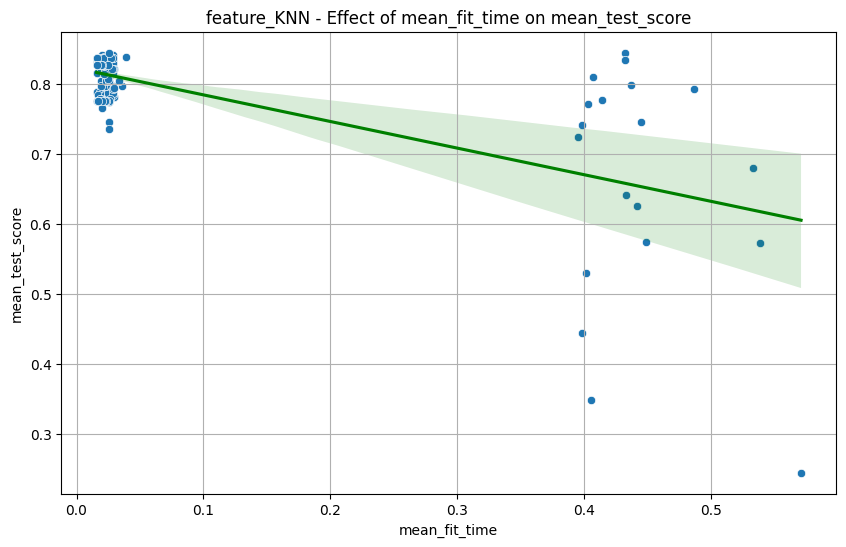

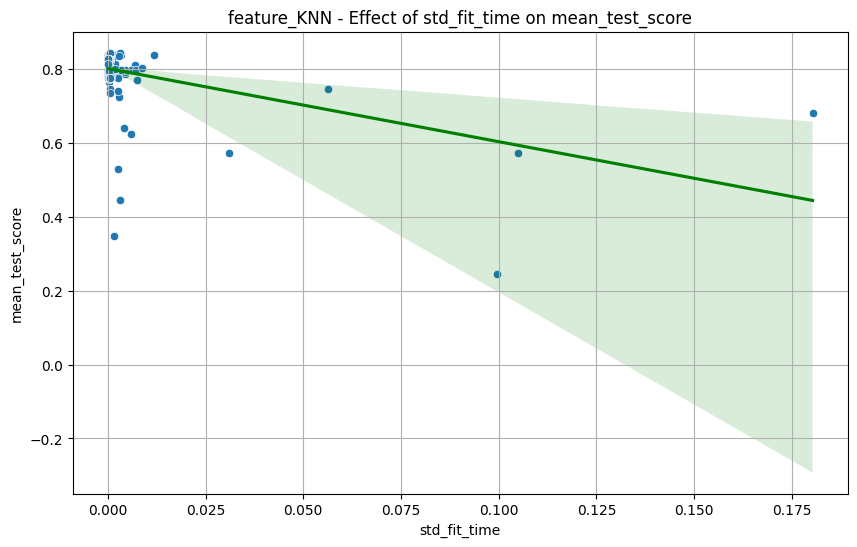

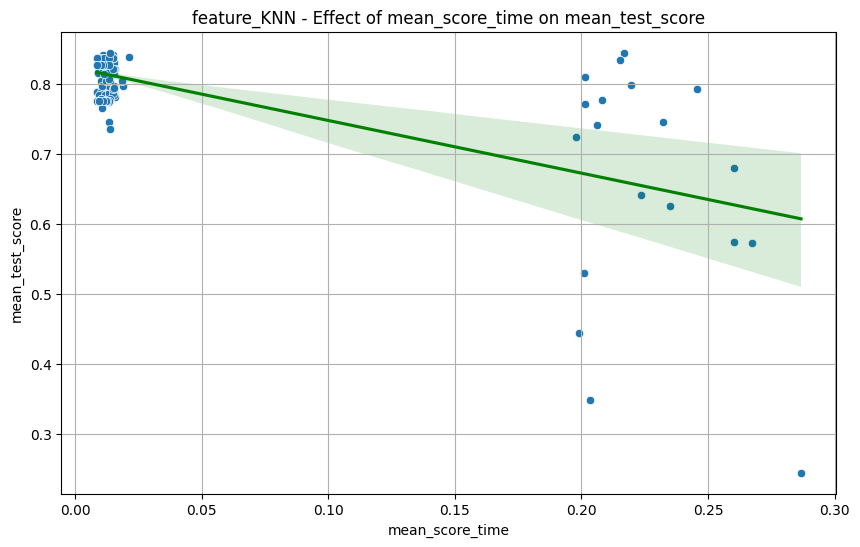

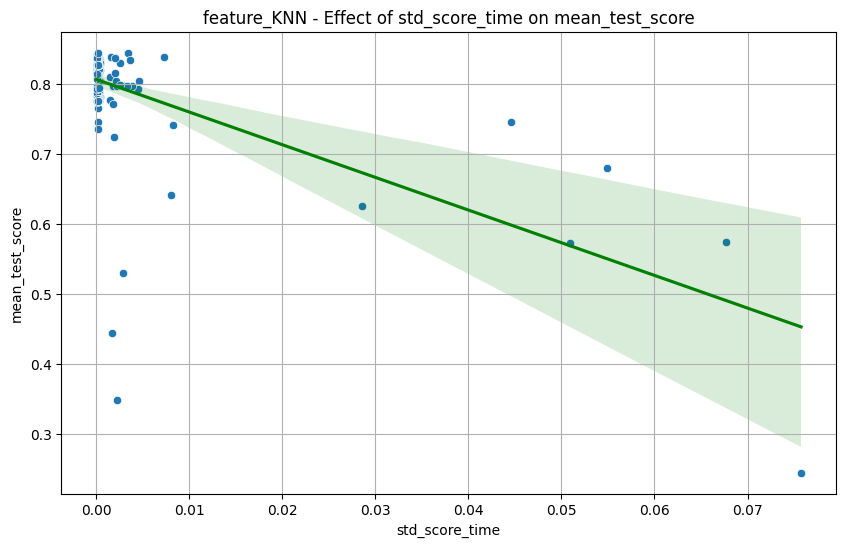

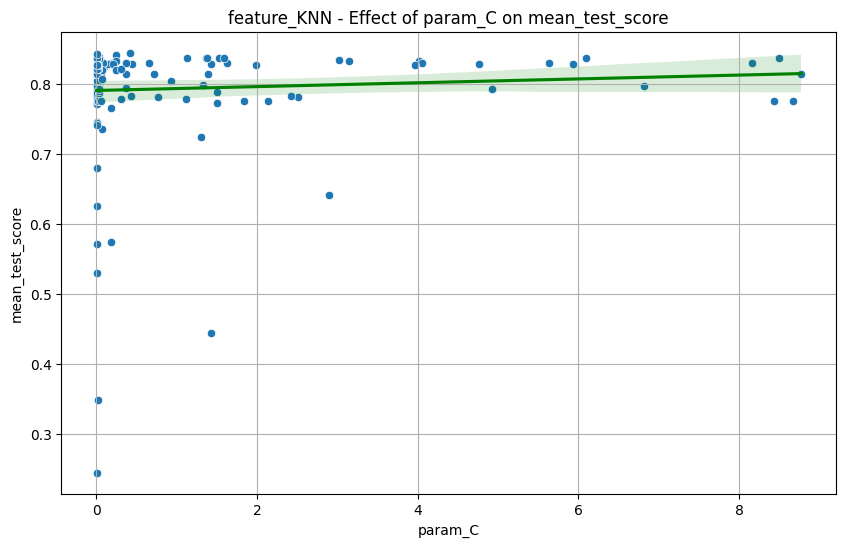

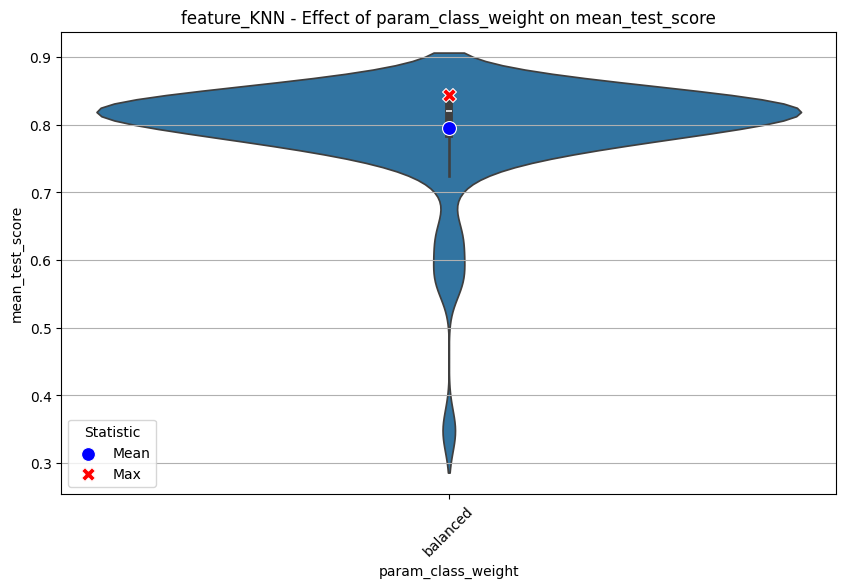

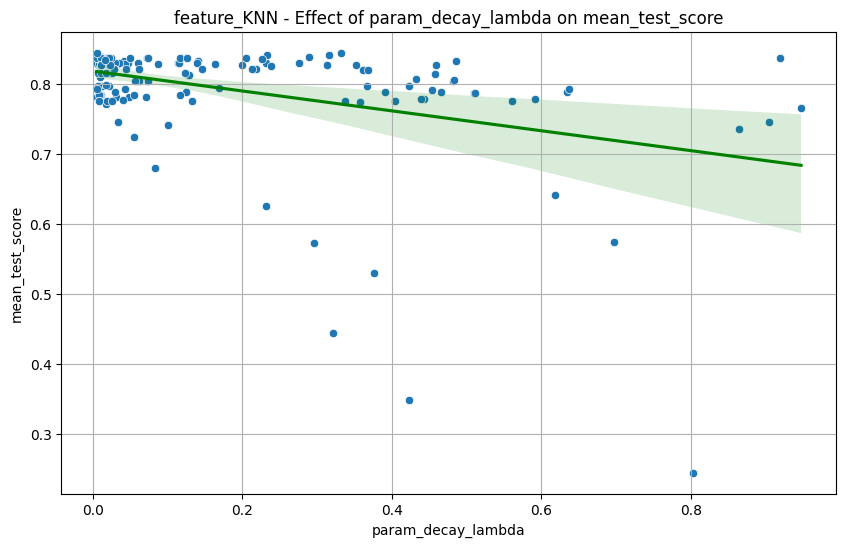

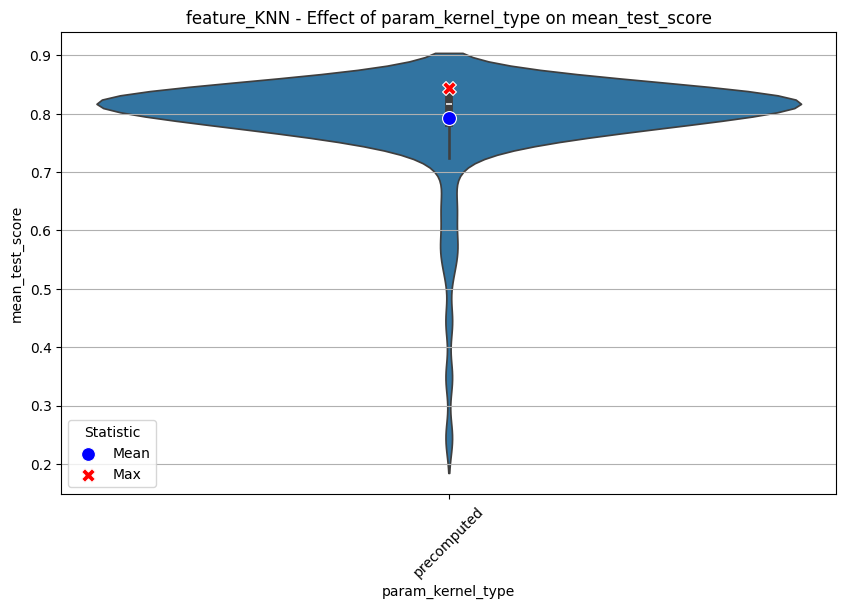

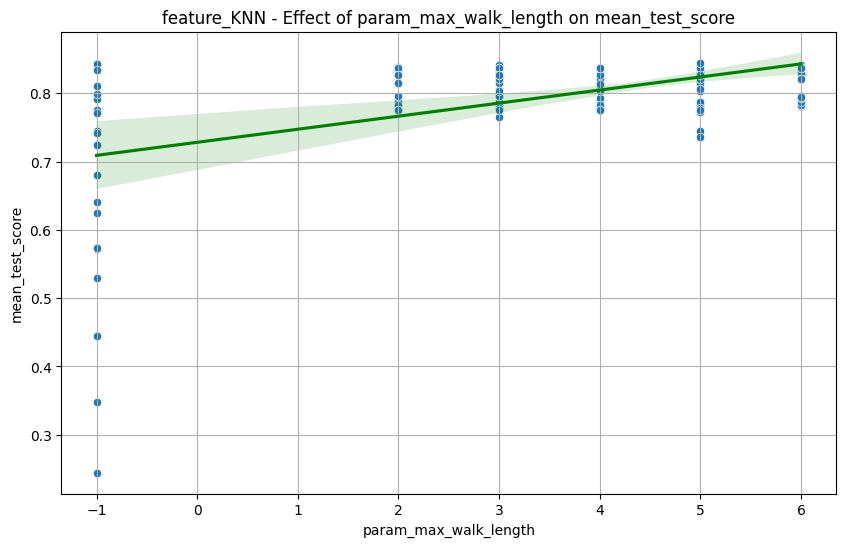

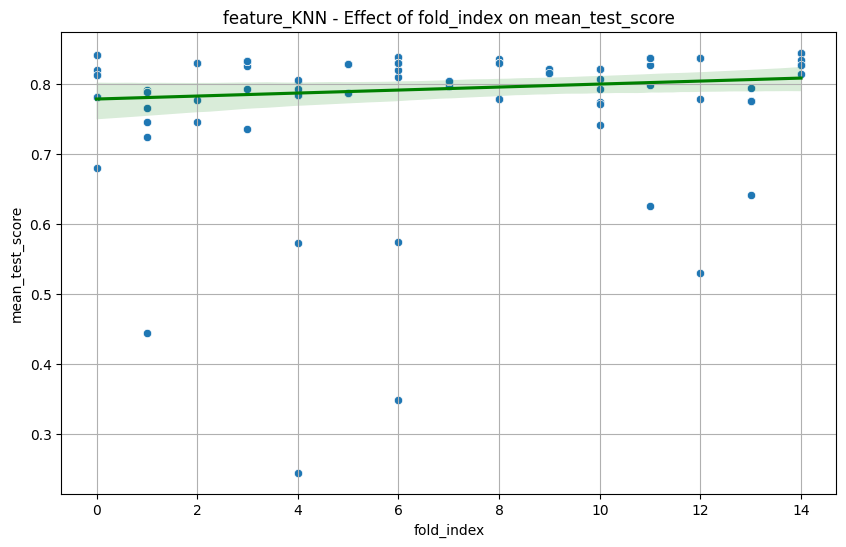

In [9]:
results_column = "mean_test_score"
Model_Name = "feature_KNN"
collums = hyper_df.columns.tolist()
collums.remove(results_column)
collums.remove("params")
collums.remove("split0_test_score")
collums.remove("split1_test_score")
collums.remove("split2_test_score")
collums.remove("split3_test_score")
collums.remove("split4_test_score")
collums.remove("std_test_score")
collums.remove("rank_test_score")
# possible filter
# hyper_df = hyper_df[hyper_df["param_t_iterations"] == 4 ]
# hyper_df = hyper_df[hyper_df["param_diffusion_function"] == "von_Neumann_diff_kernel" ]
# for i in range(15):
    # fold_df =hyper_df[hyper_df["fold_index"]==i]
for col in collums:
    if col != results_column:
        plot_hyperparameter_effect(hyper_df, col, results_column, Model_Name)

In [10]:
display(hyper_df.sort_values(by='mean_test_score', ascending=False).head(30))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_decay_lambda,param_kernel_type,param_max_walk_length,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,fold_index
143,0.025404,0.000661,0.013764,0.000254,0.418782,balanced,0.331514,precomputed,5,"{'C': 0.4187823091716992, 'class_weight': 'bal...",0.959477,0.925000,0.813665,0.699666,0.823737,0.844309,0.091715,1,14
140,0.431979,0.003046,0.216853,0.003404,0.004106,balanced,0.005548,precomputed,-1,"{'C': 0.004106314478959675, 'class_weight': 'b...",0.959477,0.925000,0.807445,0.699666,0.823737,0.843065,0.092164,2,14
6,0.020022,0.000129,0.011012,0.000055,0.245110,NaN,0.233763,precomputed,3,"{'C': 0.24511020512815337, 'class_weight': Non...",0.958960,0.928230,0.794802,0.733333,0.791667,0.841398,0.086814,1,0
0,0.028366,0.000476,0.014964,0.000268,0.002030,NaN,0.315661,precomputed,6,"{'C': 0.002030430044931339, 'class_weight': No...",0.958960,0.890110,0.829545,0.733333,0.791667,0.840723,0.078081,2,0
66,0.021391,0.002424,0.014353,0.001573,0.031502,balanced,0.289296,precomputed,2,"{'C': 0.03150230670000124, 'class_weight': 'ba...",0.955556,0.958960,0.760000,0.732143,0.784689,0.838270,0.098572,1,6
65,0.038818,0.011840,0.021258,0.007258,0.000634,balanced,0.010881,precomputed,6,"{'C': 0.0006342675621592466, 'class_weight': '...",0.955556,0.958960,0.760000,0.732143,0.784689,0.838270,0.098572,1,6
110,0.022961,0.000296,0.012367,0.000086,0.000673,balanced,0.072421,precomputed,4,"{'C': 0.0006731119235174058, 'class_weight': '...",0.961489,0.914773,0.856459,0.629630,0.823737,0.837218,0.114108,1,11
111,0.019829,0.000311,0.010830,0.000067,1.129119,NaN,0.049683,precomputed,3,"{'C': 1.1291189578061307, 'class_weight': None...",0.961489,0.914773,0.856459,0.629630,0.823737,0.837218,0.114108,1,11
114,0.025584,0.000475,0.013726,0.000096,0.001508,NaN,0.117006,precomputed,5,"{'C': 0.0015078678067994714, 'class_weight': N...",0.961489,0.914773,0.856459,0.629630,0.823737,0.837218,0.114108,1,11
115,0.027595,0.000094,0.014880,0.000092,1.361153,balanced,0.017414,precomputed,6,"{'C': 1.3611528736541008, 'class_weight': 'bal...",0.961489,0.914773,0.856459,0.629630,0.823737,0.837218,0.114108,1,11
